# Step 1: Using Build a CNN — experiment with Fashion-MNIST

- Tip: use early stopping in the validation set
- Tip: use the pipeline mentioned in https://www.tensorflow.org/datasets/keras_example

## Step 1.1: Load libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from keras import activations, datasets, layers, models, losses

c:\Users\RodrigoRenatoPomaLud\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Step 1.2: Separate and normalize the training and evaluation data.

- Fashion MNIST dataset was loaded
- As required for each model, the separation and normalization of the training and evaluation data were made.

```
AS AN EXAMPLE, HERE IS HOW THE DATASET WAS CONFIGURED FOR ALEXNET

# Normalize training data / 255
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
# 
# Expand training test dimentions for alexnet by repeating data
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

# Separating training and evaluation data
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]
```

## Step 1.3: Create and train the model.

AS AN EXAMPLE, HERE IS HOW THE MODEL WAS CONSTRUCTED
````
# Create model Alexnet
model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]),

  tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'),
  tf.keras.layers.Lambda(tf.nn.local_response_normalization),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(3, strides=2),

  tf.keras.layers.Conv2D(256, 5, strides=4, padding='same'),
  tf.keras.layers.Lambda(tf.nn.local_response_normalization),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(3, strides=2),

  tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
```

Load other models that were trained for this project:
- AlexNet
- LeNet
- ResNet
- ZfNet

In [2]:
path_input = 'models'
model_dict = {}

for file_name in os.listdir(path_input):
  if "h5" in file_name:
    name = file_name.split('.')[0]
    try:
      model_dict[name] = tf.keras.models.load_model('{}/{}'.format(path_input, file_name), compile=True)
      print("Carga exitosa: {}".format(file_name))
    except:
      print("Carga fallida: {}".format(file_name))

Carga fallida: alexnet_v1.h5
Carga exitosa: alexnet_v2.h5
Carga exitosa: lenet5_v1.h5
Carga exitosa: lenet5_v2.h5
Carga fallida: resnet_v1.h5
Carga exitosa: zfnet_v1.h5
Carga exitosa: zfnet_v2.h5


In [3]:
for model_name in model_dict:
    print("MODELO {}".format(model_name))
    print(model_dict[model_name].summary())

MODELO alexnet_v2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 12, 12, 256)      1024      
 hNormalization)                                                 
                                      

# Step 2: Plot learning curves (loss, validation loss)

## Step 1.1: Load history for trainning models.

In [4]:
history_dict = {}

for file_name in os.listdir("history/"):
    name = file_name.split('.')[0]
    print(file_name)
    history_dict[name] = pd.read_pickle('history/{}'.format(file_name))

alexnet_v1.pickle
alexnet_v2.pickle
lenet5_v1.pickle
lenet5_v2.pickle
resnet_v1.pickle
zfnet_v1.pickle
zfnet_v2.pickle


In [5]:
dataframe = pd.DataFrame()

for k in history_dict.keys():
  try:
    for k_ in history_dict[k].keys():
      if k_ in ['loss', 'accuracy', 'val_loss', 'val_accuracy']:
        dataframe["{}_{}".format(k, k_)] = pd.Series(history_dict[k][k_])
  except Exception as ex:
    print(ex)
    print("Error in {}".format(k))
    break
print(dataframe.shape)
dataframe.head()

(40, 24)


,alexnet_v1_loss,alexnet_v1_accuracy,alexnet_v1_val_loss,alexnet_v1_val_accuracy,alexnet_v2_loss,alexnet_v2_accuracy,alexnet_v2_val_loss,alexnet_v2_val_accuracy,lenet5_v1_loss,lenet5_v1_val_loss,...,resnet_v1_val_loss,resnet_v1_val_accuracy,zfnet_v1_loss,zfnet_v1_accuracy,zfnet_v1_val_loss,zfnet_v1_val_accuracy,zfnet_v2_loss,zfnet_v2_accuracy,zfnet_v2_val_loss,zfnet_v2_val_accuracy
0,0.351841,0.879810,0.071270,0.9795,0.597422,0.778583,0.375811,0.858289,1.286418,0.419222,...,0.336230,0.8798,2.302906,0.098751,2.303014,0.094920,2.307747,0.097270,2.307150,0.095254
1,0.098604,0.973793,0.050835,0.9895,0.366599,0.865719,0.306198,0.886698,0.337713,0.276095,...,0.301714,0.8898,2.302931,0.098937,2.302862,0.098596,2.305551,0.100085,2.303280,0.098429
2,0.076505,0.980983,0.051350,0.9880,0.309157,0.885707,0.264856,0.901738,0.250929,0.207348,...,0.280007,0.8948,2.302881,0.099807,2.302898,0.100602,2.304931,0.100308,2.303968,0.100434
3,0.060378,0.984879,0.060145,0.9850,0.272625,0.899526,0.255999,0.906918,0.204114,0.170832,...,0.259174,0.9048,2.302779,0.099474,2.302751,0.097426,2.303205,0.098714,2.303112,0.094920
4,0.052771,0.987241,0.048389,0.9895,0.246276,0.908566,0.242157,0.911263,0.173003,0.145745,...,0.255420,0.9046,2.302673,0.098974,2.302739,0.097594,2.302926,0.098455,2.302663,0.096925


## Step 1.3: Plot training model history.

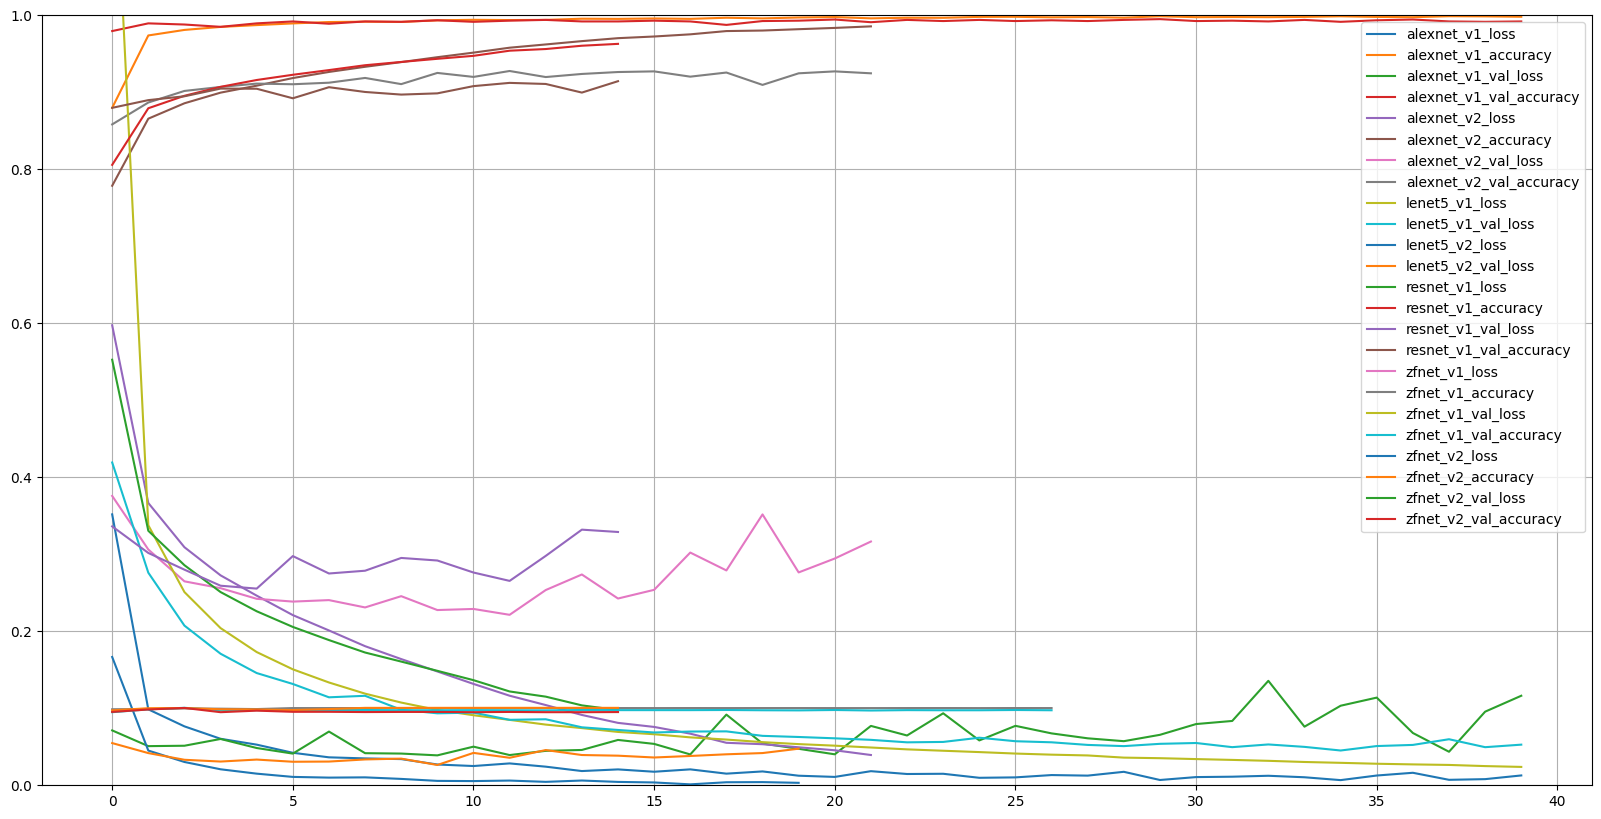

In [6]:
dataframe.plot(figsize=(20, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Step 2: Plot learning curves (loss, validation loss)

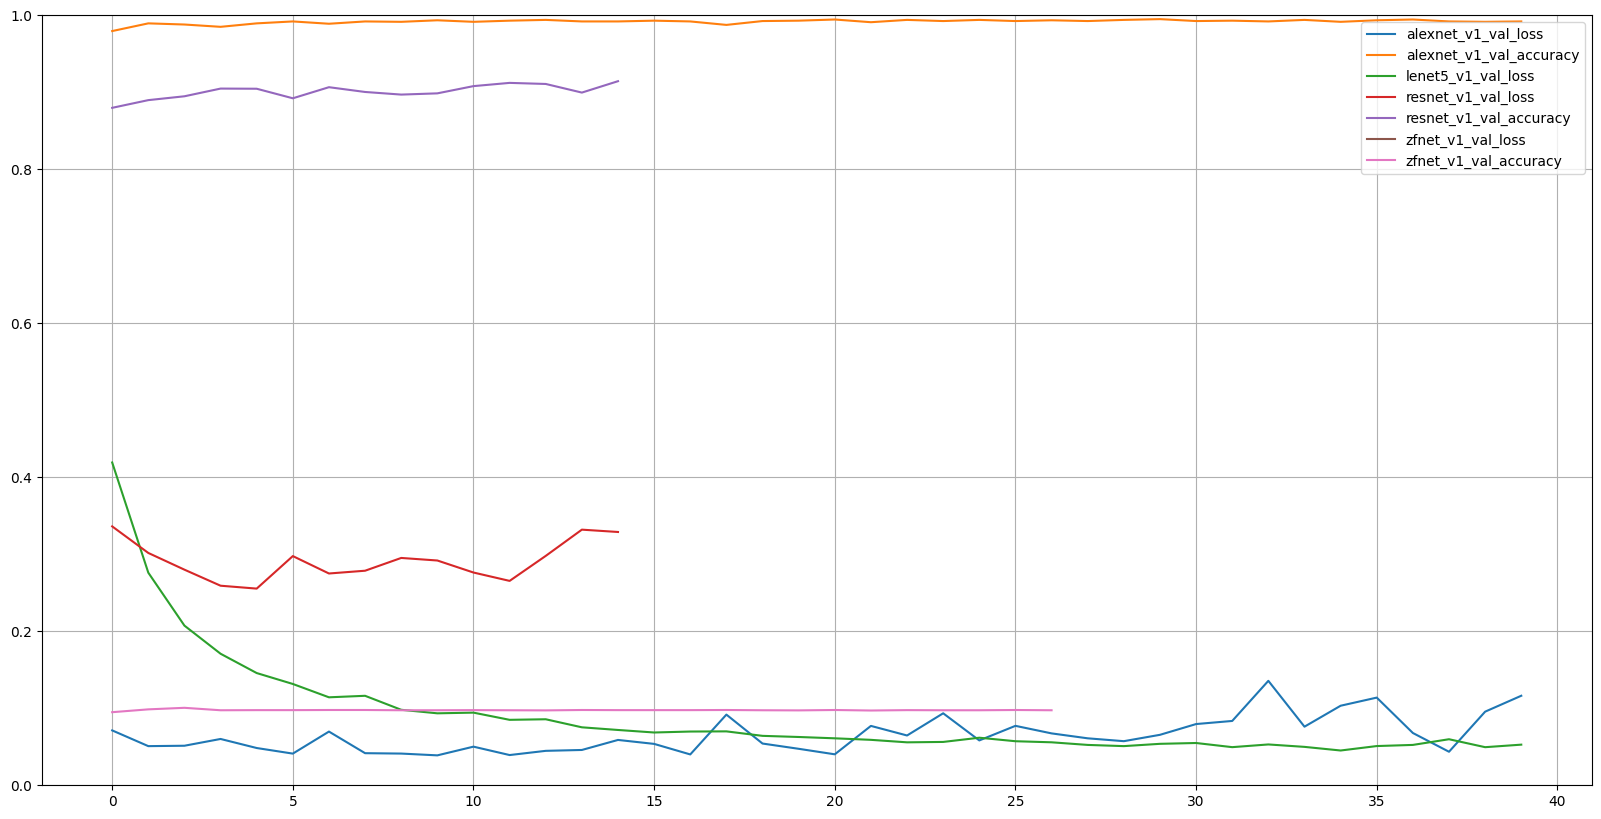

In [7]:
val_cols = [x for x in dataframe.columns if ('val' in x) & ('v1' in x)]
dataframe[val_cols].plot(figsize=(20, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Step 3: Report the error in the test set

In [8]:
test_dict = {
    'alexnet' : {'loss': 0.0870, 'accuracy': 0.9898},
    'lenet' : {'loss': 0.0452, 'accuracy': 0.9860},
    'resnet' : {'loss': 0.2725, 'accuracy': 0.8970},
    'zfnet' : {'loss': 2.3026, 'accuracy': 0.0999}
}

In [9]:
dataframe_test = pd.DataFrame()

for model_name in test_dict:
    #for metric in test_dict[model_name].keys():
        #dataframe_test['{}_{}'.format(model_name, metric)] = pd.Series([test_dict[model_name][metric]])
    #dataframe_test = dataframe_test.append(test_dict[model_name])
    dataframe_test[model_name] = pd.Series(
        test_dict[model_name],
        index=test_dict[model_name].keys()
    )
dataframe_test

,alexnet,lenet,resnet,zfnet
loss,0.0870,0.0452,0.2725,2.3026
accuracy,0.9898,0.9860,0.8970,0.0999


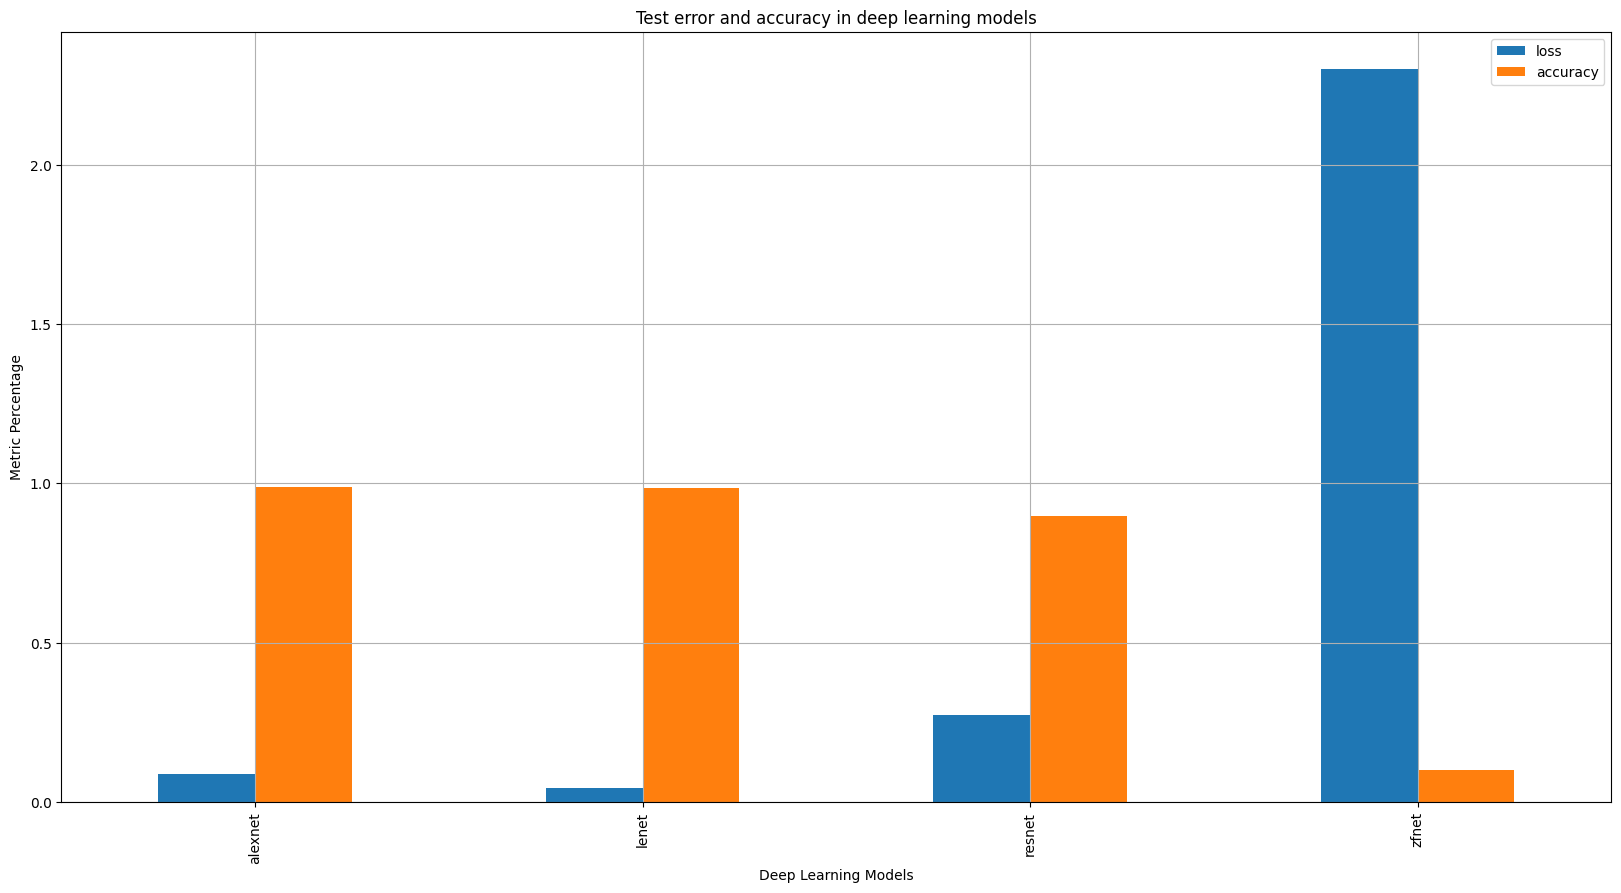

In [10]:
dataframe_test.T.plot.bar(figsize=(20, 10))
 
plt.xlabel("Deep Learning Models")
plt.ylabel("Metric Percentage")
plt.title("Test error and accuracy in deep learning models")
#plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()


plt.show()